In [0]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
%matplotlib inline
from keras import backend as K

In [0]:
import sys

Load Dataset And Preprocess Dataset

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [27]:
X_train[1].shape

(32, 32, 3)

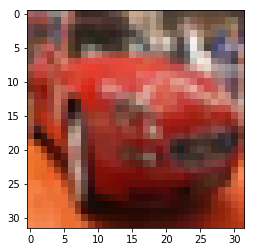

In [28]:
plt.imshow(X_train[5])
plt.show()

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float')/255.0

In [30]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]
print(num_classes)

10


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D , GlobalAveragePooling2D, Dropout, Activation
from keras.optimizers import SGD
from keras.models import load_model

In [0]:
model = Sequential()

model.add(Conv2D(96, (3, 3), padding = 'same', input_shape = (32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3), padding = 'same' ))
model.add(Activation('relu'))
model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(192, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2, 2)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(192, (3, 3), padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(192, (1, 1), padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(10, (1, 1), padding = 'valid'))

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))


In [33]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)      

In [0]:
# model.fit(X_train, Y_train,
#           validation_data = (X_test, Y_test),
#          epochs = 350,
#          batch_size = 32,
#           verbose = 1)

Using Pretrained Weights

In [0]:
model = load_model('all_cnn_weights_0.9088_0.4994.hdf5')

Test the model with pretrained weight

In [36]:
scores = model.evaluate(X_test, Y_test, verbose = 1)
print(('Accuracy : {}'.format(scores[1])))

10000/10000 [==============================] - 4s 424us/step
Accuracy : 0.9088


In [37]:
classes = range(0, 10)
names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck']

class_labels = dict(zip(classes, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [38]:
# generate batch of 9 images to predict

batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis = -1)

# predictions

predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 13ms/step


In [39]:
predictions

array([[4.5647404e-18, 1.0580944e-20, 1.8923134e-10, 2.1411485e-11,
        9.9999928e-01, 2.8037709e-07, 3.1479029e-13, 4.2382177e-07,
        1.3699504e-19, 1.2096835e-18],
       [2.1191630e-16, 2.0387947e-17, 1.5672766e-09, 5.3581920e-07,
        1.6256203e-10, 9.9999940e-01, 1.6712586e-09, 2.0782505e-08,
        3.6550979e-15, 3.5129402e-16],
       [1.2720516e-30, 5.0273257e-28, 5.1540610e-24, 3.6051960e-21,
        1.0875389e-27, 8.1523708e-22, 1.0000000e+00, 1.1050866e-27,
        6.1924613e-32, 1.2273912e-23],
       [1.5143828e-16, 4.7667238e-18, 2.2583779e-09, 1.0000000e+00,
        4.3480382e-11, 1.6883953e-12, 4.5315913e-13, 2.6686443e-16,
        7.2660253e-19, 6.2049703e-17],
       [8.2496687e-36, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.3555905e-36,
        8.6863322e-30, 8.2188497e-22],
       [5.9702689e-24, 1.0000000e+00, 7.5488142e-27, 8.0230521e-27,
        1.9714703e-30, 2.7339758e-29, 7.2189586e-31, 5.56

In [40]:
for image in predictions:
  print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [42]:
class_results = np.argmax(predictions, axis = -1)
class_results

array([4, 5, 6, 3, 1, 1, 3, 6, 8])